In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("data/modified_train_0417.csv")

In [112]:
df['loan_amnt'].head()

0     6000.0
1    23200.0
2    16000.0
3     4500.0
4    20000.0
Name: loan_amnt, dtype: float64

In [7]:
df.columns

Index(['Unnamed: 0', 'loan_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_length', 'annual_inc', 'loan_status', 'addr_state',
       'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'collections_12_mths_ex_med', 'application_type',
       'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'open_rv_12m', 'open_rv_24m',
       'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'total_cu_tl',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_b

In [51]:
df['int_rate'].value_counts()

int_rate
11.99    25890
10.99    25635
5.32     25073
13.99    23215
11.49    18352
         ...  
24.76        1
14.62        1
17.50        1
15.07        1
9.83         1
Name: count, Length: 637, dtype: int64

In [ ]:
from scipy.stats import boxcox

columns = ['loan_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_length', 'annual_inc', 
       'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'collections_12_mths_ex_med', 'application_type',
       'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'open_rv_12m', 'open_rv_24m',
       'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'total_cu_tl',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'revol_bal_joint']
for column in columns:
    skews = []   
    plt.figure(figsize=(15, 30))
    # normal
    n_skew = df[column].skew()
    skews.append(n_skew)
    plt.subplot(3, 1, 1)
    sns.kdeplot(x=column, 
                data=df, 
                fill=True, bw_method=0.2
                )
    plt.title(f'normal_skew: {n_skew}')
    # log
    log_column = column+'_log'
    df[log_column] = np.log(df[column])
    log_skew = df[log_column].skew()
    skews.append(log_skew)
    plt.subplot(3, 1, 2)
    sns.kdeplot(x=log_column, 
                data=df, 
                fill=True, bw_method=0.2
                )
    plt.title(f'log_skew: {log_skew}')
    # sqrt
    sqrt_column = column+'_sqrt'
    df[sqrt_column] = np.sqrt(df[column])
    sqrt_skew = df[sqrt_column].skew()
    skews.append(sqrt_skew)
    plt.subplot(3, 1, 3)
    sns.kdeplot(x=sqrt_column, 
                data=df, 
                fill=True, bw_method=0.2
                )
    plt.title(f'sqrt_skew: {sqrt_skew}')
    '''
    # box-cox
    box_column = column+'_box'
    df[box_column], _ = boxcox(df[column])
    box_skew = df[box_column].skew()
    plt.subplot(4, 1, 2)
    sns.kdeplot(x=box_column, 
                data=df, 
                fill=True, bw_method=0.2
                )
    plt.title(f'log{box_skew}')
    '''
    skews = np.abs(skews)
    min_skew = np.min(skews)
    methods = ['normal', 'log', 'sqrt']
    method = methods[np.argmin(skews)]
    plt.tight_layout()
    plt.savefig(f'plots/{column}_{method}_{min_skew}.png')

In [70]:
import inspect

def get_current_function():
	return inspect.currentframe().f_code.co_name

In [97]:
columns = ['loan_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'collections_12_mths_ex_med', 'application_type',
       'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'open_rv_12m', 'open_rv_24m',
       'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'total_cu_tl',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'revol_bal_joint']
for column in columns:
       if len(df[column].unique())<10:
              print(column)

term
inq_last_6mths
application_type
acc_now_delinq
num_tl_120dpd_2m
num_tl_30dpd


In [105]:
df['num_tl_30dpd'].unique()

array([0., 1., 2., 3., 4.])

/Users/admin/anaconda3/envs/tf_env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/admin/anaconda3/envs/tf_env/lib/python3.11/site-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


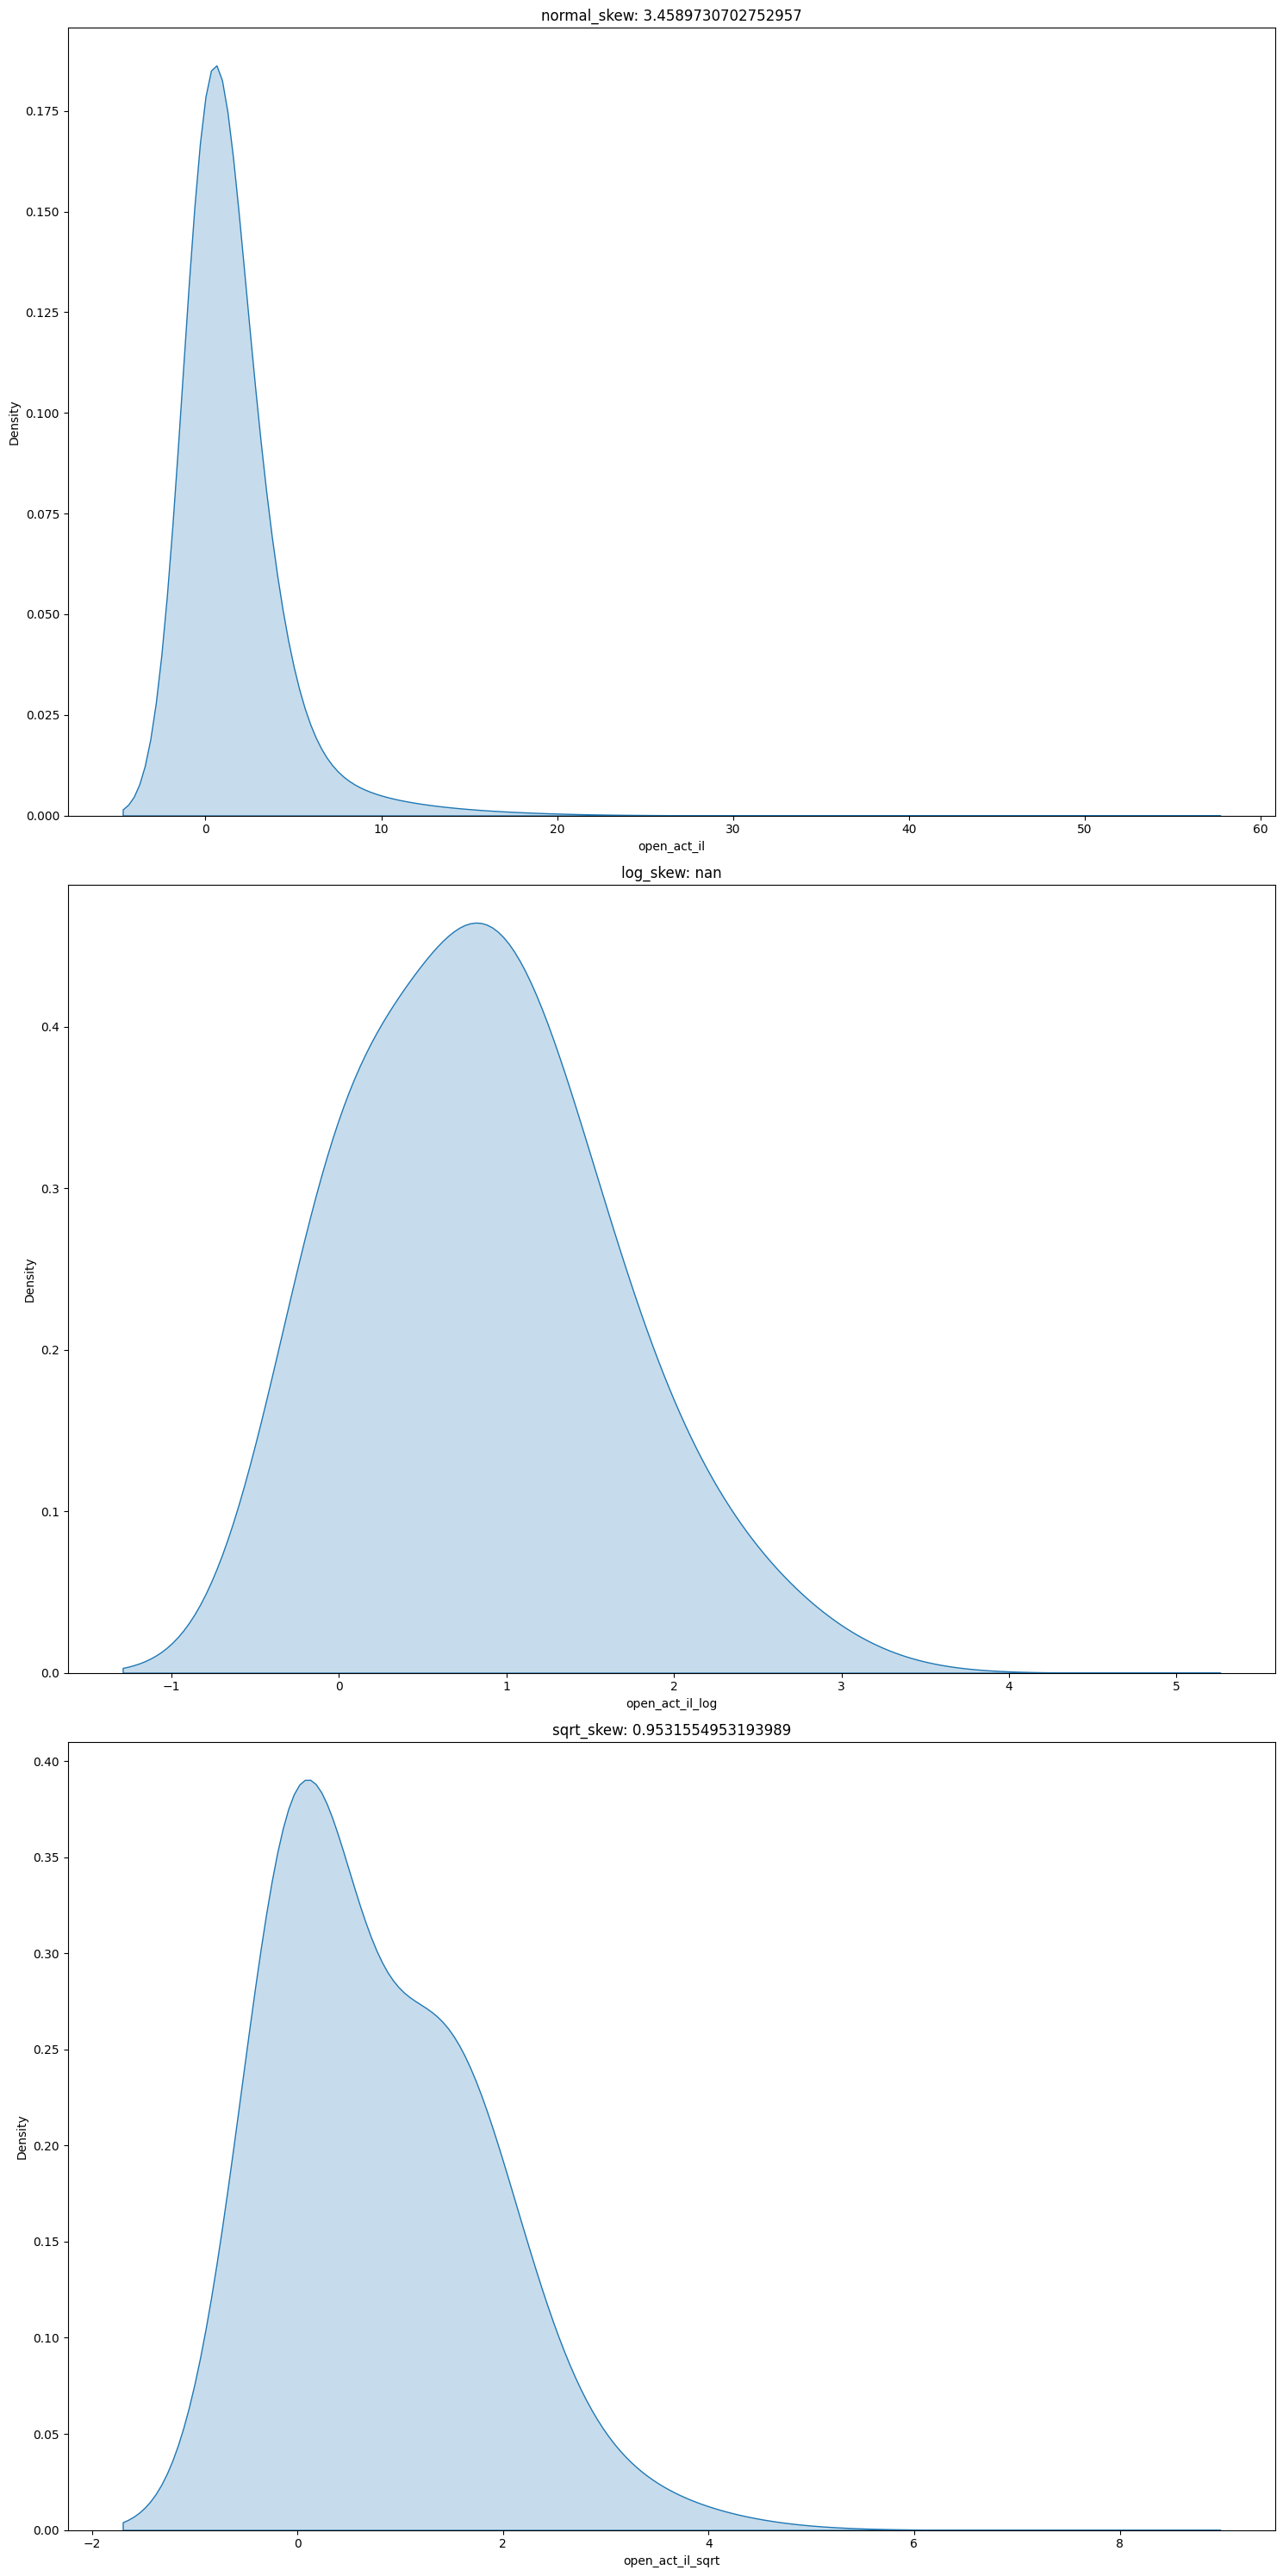

In [110]:
from scipy.stats import boxcox

columns = ['open_act_il']
for column in columns:
    skews = []   
    plt.figure(figsize=(15, 30))
    # normal
    n_skew = df[column].skew()
    skews.append(n_skew)
    plt.subplot(3, 1, 1)
    sns.kdeplot(x=column, 
                data=df, 
                fill=True, bw_method=0.6
                )
    plt.title(f'normal_skew: {n_skew}')
    # log
    log_column = column+'_log'
    df[log_column] = np.log(df[column])
    log_skew = df[log_column].skew()
    skews.append(log_skew)
    plt.subplot(3, 1, 2)
    sns.kdeplot(x=log_column, 
                data=df, 
                fill=True, bw_method=0.6
                )
    plt.title(f'log_skew: {log_skew}')
    # sqrt
    sqrt_column = column+'_sqrt'
    df[sqrt_column] = np.sqrt(df[column])
    sqrt_skew = df[sqrt_column].skew()
    skews.append(sqrt_skew)
    plt.subplot(3, 1, 3)
    sns.kdeplot(x=sqrt_column, 
                data=df, 
                fill=True, bw_method=0.6
                )
    plt.title(f'sqrt_skew: {sqrt_skew}')
    '''
    # box-cox
    box_column = column+'_box'
    df[box_column], _ = boxcox(df[column])
    box_skew = df[box_column].skew()
    plt.subplot(4, 1, 2)
    sns.kdeplot(x=box_column, 
                data=df, 
                fill=True, bw_method=0.2
                )
    plt.title(f'log{box_skew}')
    '''
    skews = np.abs(skews)
    min_skew = np.min(skews)
    methods = ['normal', 'log', 'sqrt']
    method = methods[np.argmin(skews)]
    plt.tight_layout()
    plt.savefig(f'{column}_{method}_{min_skew}.png')

In [ ]:
plot_columns(columns)